In [1]:
# Import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import sem

In [2]:
# Save path to CSV file as variable
data_file = Path("Resources/us_births_2016_2021.csv")

In [3]:
# Read CSV file using Pandas
data_file_df = pd.read_csv(data_file)
data_file_df

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3
...,...,...,...,...,...,...,...,...,...
5491,Wyoming,WY,2021,M,"Associate degree (AA, AS)",5,401,29.2,3261.1
5492,Wyoming,WY,2021,M,"Bachelor's degree (BA, AB, BS)",6,657,30.7,3286.0
5493,Wyoming,WY,2021,M,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",7,261,33.0,3249.3
5494,Wyoming,WY,2021,M,"Doctorate (PhD, EdD) or Professional Degree (M...",8,72,33.3,3262.0


In [4]:
data_file_df.head()

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3


In [5]:
# Info on each of the columns
data_file_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5496 entries, 0 to 5495
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          5496 non-null   object 
 1   State Abbreviation             5496 non-null   object 
 2   Year                           5496 non-null   int64  
 3   Gender                         5496 non-null   object 
 4   Education Level of Mother      5496 non-null   object 
 5   Education Level Code           5496 non-null   int64  
 6   Number of Births               5496 non-null   int64  
 7   Average Age of Mother (years)  5496 non-null   float64
 8   Average Birth Weight (g)       5496 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 386.6+ KB


1. Average Birth Weight (g) Per State

In [6]:
# Find the average birth weight per state

# Use .groupby to group states
# Use .aggregate to find the mean birth weight for each state
# Sort the values from least to greatest
# Round values to nearest whole number
avg_weight_df = data_file_df.groupby("State").aggregate({"Average Birth Weight (g)": "mean"}).sort_values(by = "Average Birth Weight (g)", ascending = True).round()
avg_weight_df

,Average Birth Weight (g)
State,
Mississippi,3137.0
Louisiana,3169.0
Wyoming,3169.0
District of Columbia,3171.0
New Mexico,3171.0
Colorado,3174.0
Alabama,3195.0
Georgia,3199.0
South Carolina,3208.0


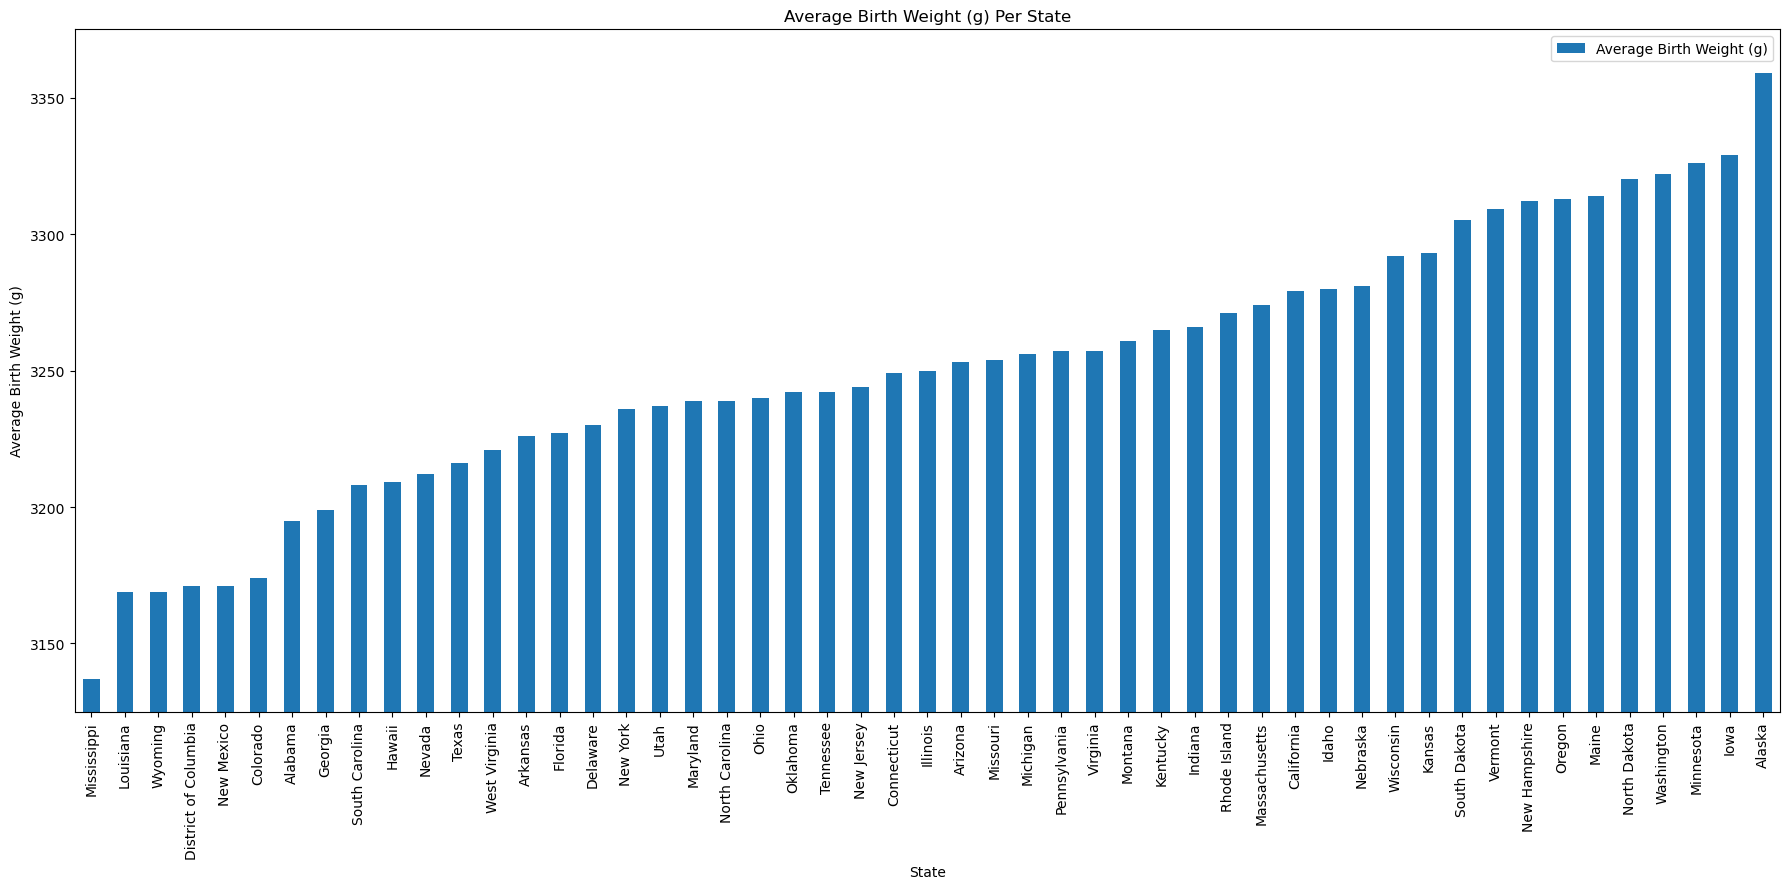

In [7]:
# Create bar graph visualizing filtered dataframe
weight_chart = avg_weight_df.plot(kind = "bar", figsize = (18,9))
plt.ylim(3125, 3375)

# Set title and axes labels
plt.title("Average Birth Weight (g) Per State")
plt.xlabel("State")
plt.ylabel("Average Birth Weight (g)")

# Adjust figure size
plt.tight_layout()

# Save and export figure to Images folder
plt.savefig("Images/avg_weight_per_state.png")

# Show completed figure
plt.show()

In [8]:
# Calculate statistics
print(f"The mean baby weight over all States is: {round(avg_weight_df['Average Birth Weight (g)'].mean(),2)}")
print(f"The standard deviation over all States is: {round(avg_weight_df['Average Birth Weight (g)'].std(),2)}")

The mean baby weight over all States is: 3250.98
The standard deviation over all States is: 48.88


2. Number of Births Per State Per Gender

In [9]:
births_per_state = data_file_df.groupby(['State', 'Gender'])['Number of Births'].sum().reset_index()
births_per_state

,State,Gender,Number of Births
0,Alabama,F,170911
1,Alabama,M,179258
2,Alaska,F,29296
3,Alaska,M,31102
4,Arizona,F,235677
...,...,...,...
97,West Virginia,M,55567
98,Wisconsin,F,186425
99,Wisconsin,M,194908
100,Wyoming,F,19357


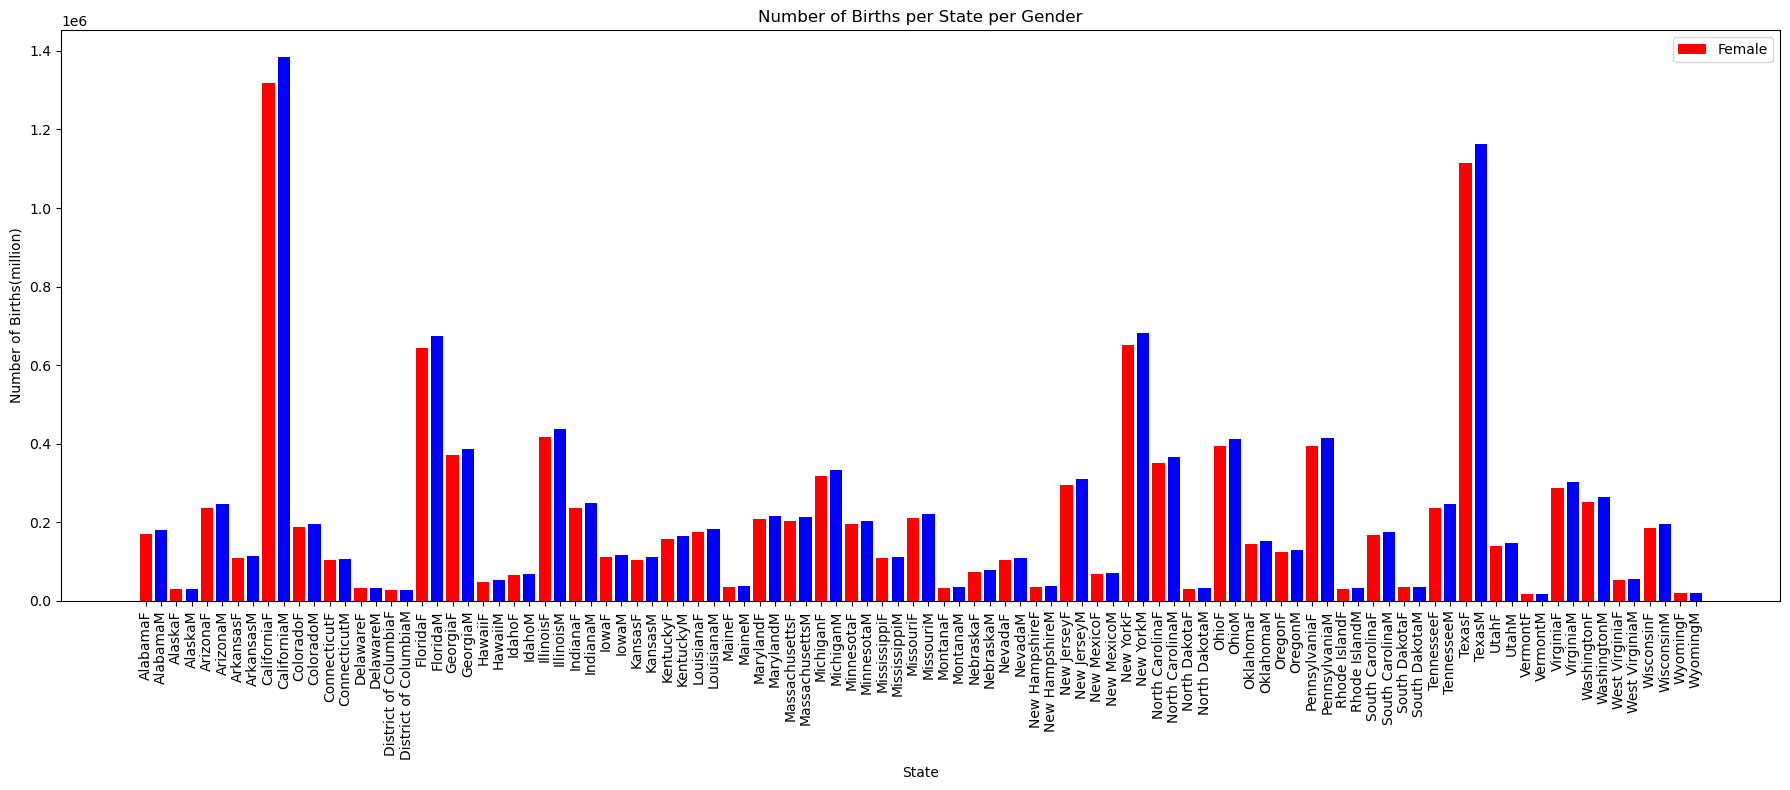

In [10]:
# Visualize the number of births per state per gender
births_per_state = pd.DataFrame({
    'State': (births_per_state.iloc[:, 0]),
    'Gender':(births_per_state.iloc[:, 1]),
    'Number of Births':(births_per_state.iloc[:, 2])
})

colors = ['red', 'blue']
female = births_per_state[births_per_state['Gender'] == 'Female']
male = births_per_state[births_per_state['Gender'] == 'Male']

#Create bar chart
plt.figure(figsize=(18, 8))
plt.bar((births_per_state['State'] + births_per_state['Gender']), births_per_state['Number of Births'], color=colors)
plt.xlabel('State')
plt.ylabel('Number of Births(million)')
plt.title('Number of Births per State per Gender')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=90)
plt.tight_layout() 

# Save the figure
plt.savefig('Images/number_of_births_per_state_per_gender.png')

plt.show()